In [3]:
# 
import sys
import os
import math
import logging
import galsim
import matplotlib.pyplot as plt
import h5py
import numpy as np 
import random 
import copy 
img_ = np.zeros((10000,64,64))
img_nonoise_ = np.zeros((10000,64,64))
gal_flux_ = np.zeros(10000)
bulge_re_ =np.zeros(10000)
bulge_n_ =np.zeros(10000)
gal_q_ = np.zeros(10000)
gal_beta_ = np.zeros(10000)
noise_=np.zeros(10000)




In [70]:
10**np.log10(100)

100.0

In [155]:
size=300
noise_=np.zeros(300)
bulge_n_ =np.zeros(300)
g_1_= np.zeros(size)
g_2_= np.zeros(size)

gal_q_ = np.zeros(300)
gal_beta_ = np.zeros(300)


for i in range(300): # fixed parameters 
    
    a=random.uniform(0,0.75)    # gal_q =b/a will ranges in (0.14,1)
    gal_q=(1- a ) /(1+ a ) 
    gal_beta = random.uniform(0,3.14)        #  radians 
    
    
    g_1=(1- gal_q) /(1+ gal_q ) *np.cos(2*gal_beta)
    g_2=(1- gal_q) /(1+ gal_q ) *np.sin(2*gal_beta)
    
    g_1_[i]=g_1
    g_2_[i]=g_2
    gal_q_[i]=gal_q
    gal_beta_[i]=gal_beta
    
    

(array([67., 41., 29., 26., 30., 21., 26., 28., 12., 20.]),
 array([0.14296077, 0.22851612, 0.31407147, 0.39962683, 0.48518218,
        0.57073753, 0.65629289, 0.74184824, 0.82740359, 0.91295895,
        0.9985143 ]),
 <a list of 10 Patch objects>)

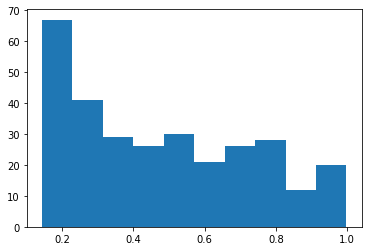

In [156]:
plt.hist(_)

In [157]:
gal_q_.min()

0.14296076661831425

In [158]:
gal_q_.max()

0.9985142988376152

In [81]:
    gal_q = random.uniform(0.2,0.7)       # (axis ratio 0 < q < 1)
    gal_beta = random.uniform(0,3.14)        #  radians 


0.785

(array([30., 58., 71., 42., 36., 23., 18., 10.,  7.,  5.]),
 array([-0.01908027,  0.07041069,  0.15990164,  0.24939259,  0.33888355,
         0.4283745 ,  0.51786545,  0.6073564 ,  0.69684736,  0.78633831,
         0.87582926]),
 <a list of 10 Patch objects>)

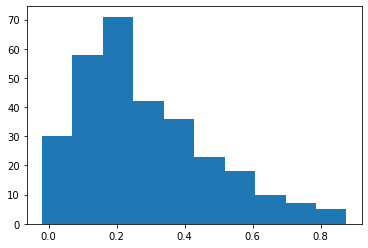

In [88]:
plt.hist(gal_q_)

In [17]:
#for i in range(10000): # fixed parameters 
    image_size = 64     # n x n pixels
    pixel_scale = 0.23     # arcsec / pixel
    random_seed = 1314662
    rng = galsim.BaseDeviate(random_seed+1)
    psf_beta = 2       #moffat parameter 
    psf_re=0.5     # moffat scale radius in arcsec 
    noise= 900#random.uniform(.5,4.5) 
    
    
    #parameter random generations  
    gal_flux = 0.5e5 #* random.uniform(.5,4.5)  # range sigma=300 S/N= 10 to 120      # ADU  ("Analog-to-digital units", the units of the numbers on a CCD)
    bulge_re = 0.6#random.uniform(0.1,0.6)         # arcsec
    bulge_n =3 #random.uniform(0.5,6)          # uniform in log !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    gal_q = 0.1#random.uniform(0.2,0.7)       # (axis ratio 0 < q < 1)  !!!!!!!!!!
    gal_beta = 0.3#random.uniform(0,3.14)        #  radians 
 
    gal = galsim.Sersic(bulge_n, half_light_radius=bulge_re)
    gal = gal.withFlux(gal_flux)
    gal_shape = galsim.Shear(q=gal_q, beta=gal_beta*galsim.radians)
    gal = gal.shear(gal_shape)
    psf = galsim.Moffat(beta=psf_beta, flux=1., fwhm=psf_re)   
    final = galsim.Convolve([psf, gal])
    image = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final.drawImage(image=image)
    image_nonoise = copy.deepcopy(image.array)
    plt.imshow(image_nonoise)

48746.477

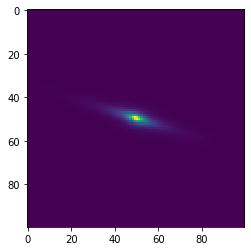

In [16]:
image_nonoise.sum()

46942.363

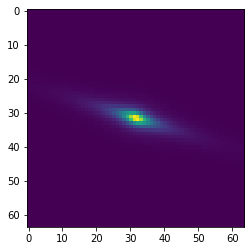

In [18]:
image_nonoise.sum()

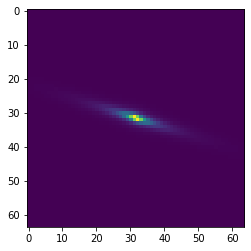

In [6]:
    plt.imshow(image_nonoise)

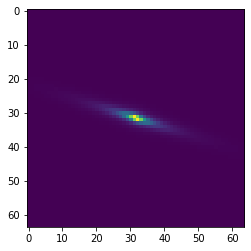

In [7]:
plt.imshow(image.array.data)

5.5796104600694445


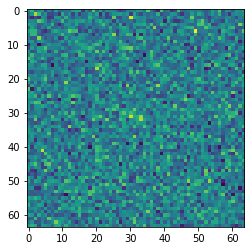

In [8]:

    
    snr=np.sqrt((image.array**2).sum())/noise #noise=sigma 
    
    image.addNoise(galsim.GaussianNoise(sigma=noise))  #add noise 
    final_2 = psf
    image_2 = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final_2.drawImage(image=image_2)    
    
    plt.imshow(image.array)    
    
    print(snr)
   # np.sqrt((image.array**2).sum())/300  # signal to noise calculation 


In [9]:
image.array.max()

3593.7087

In [10]:
image.array.max()/900

3.9930097113715277

In [11]:
snr

5.5796104600694445

In [ ]:
image.array.sum

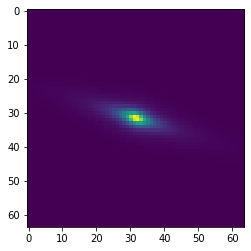

In [6]:
plt.imshow( image_nonoise)

In [7]:
image.array

array([[-190.02435  , -394.85373  ,  181.89073  , ..., -147.85248  ,
        -305.4957   ,  -92.16111  ],
       [-124.29775  ,  163.73257  ,   73.182594 , ..., -265.23163  ,
         367.97363  ,  150.01413  ],
       [-139.53073  ,  -88.67154  ,  301.39294  , ...,  -70.86708  ,
         279.0569   ,   95.22172  ],
       ...,
       [  90.61767  ,  319.30215  ,  -64.13682  , ..., -193.95432  ,
        -535.927    , -196.10178  ],
       [-206.12962  ,  245.99825  , -169.87648  , ...,  117.78675  ,
        -380.50888  , -386.5685   ],
       [ 111.11492  ,    1.3273523,  149.8531   , ..., -530.07245  ,
         339.06638  ,  286.24188  ]], dtype=float32)

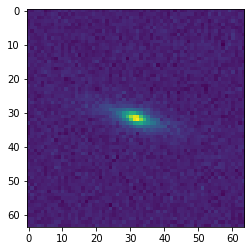

In [8]:
plt.imshow(image.array)

In [9]:
2.7277**2

7.44034729

In [10]:
image_2.array**2

array([[6.65869066e-14, 7.44075347e-14, 8.32754615e-14, ...,
        8.32432132e-14, 7.43977498e-14, 6.65666117e-14],
       [7.44332303e-14, 8.35460648e-14, 9.39656000e-14, ...,
        9.39692050e-14, 8.35105571e-14, 7.43462231e-14],
       [8.32719378e-14, 9.39573533e-14, 1.06216631e-13, ...,
        1.06200510e-13, 9.39107326e-14, 8.31537123e-14],
       ...,
       [8.32101857e-14, 9.39398773e-14, 1.06189675e-13, ...,
        1.06162617e-13, 9.39480495e-14, 8.32845010e-14],
       [7.43528367e-14, 8.34734097e-14, 9.39008731e-14, ...,
        9.39430147e-14, 8.35446485e-14, 7.44431236e-14],
       [6.65318156e-14, 7.43277781e-14, 8.31760198e-14, ...,
        8.32437214e-14, 7.44045532e-14, 6.66033662e-14]], dtype=float32)

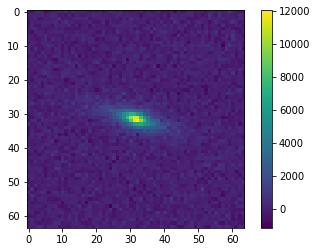

In [11]:

    plt.imshow(image.array)
    plt.colorbar()

In [12]:
image_2.array.max()

0.076418556

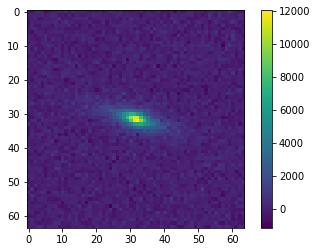

In [13]:
plt.imshow(image.array)
plt.colorbar()


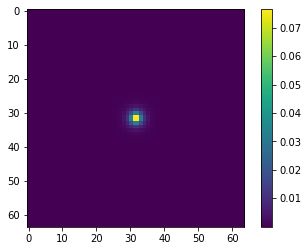

In [14]:
    final_2 = psf
    image_2 = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final_2.drawImage(image=image_2)
    plt.imshow(image_2.array)
    plt.colorbar()


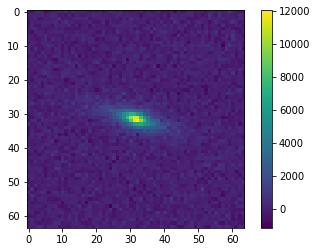

In [15]:
plt.imshow(image.array)
plt.colorbar()


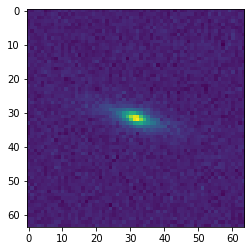

In [16]:
plt.imshow(image.array)

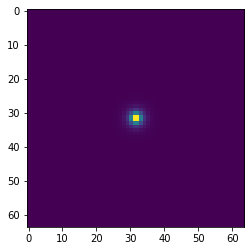

In [17]:
plt.imshow(image_2.array)

In [18]:
'''
    
    img_[i]= np.abs(image.array)  # to eliminate negative pixel value 
    gal_flux_[i] = gal_flux
    bulge_re_[i] =bulge_re
    bulge_n_[i] =bulge_n
    gal_q_[i] =gal_q
    gal_beta_[i] = gal_beta
    
    
    if i % 10 == 0:
        print(i)

    

    
    

with h5py.File("train.h5", "w") as fnew:
    fnew.create_dataset('img', data=img_)
    fnew.create_dataset('gal_flux', data=gal_flux_)
    fnew.create_dataset('bulge_n', data=bulge_n_)   
    fnew.create_dataset('bulge_re', data=bulge_re_)
    fnew.create_dataset('gal_q', data=gal_q_)
    fnew.create_dataset('gal_beta', data=gal_beta_)

print("yayyyyy, finish running")    
''''''
  

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-18-ee40e4e77397>, line 29)

In [ ]:
image

In [ ]:
image.array

In [ ]:
image.array.sum()

In [ ]:
np.sqrt((image.array**2).sum()/90000-40**2)